In [50]:
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns
#pip install sklearn
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import pickle

In [7]:
dataset=pd.read_csv("OnlineNewsPopularity.csv",sep=", ")
dataset.info()

C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39604 entries, 33365 to 17267
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39604 non-null  object 
 1   timedelta                      39604 non-null  float64
 2   n_tokens_title                 39604 non-null  float64
 3   n_tokens_content               39604 non-null  float64
 4   n_unique_tokens                39604 non-null  float64
 5   n_non_stop_words               39604 non-null  float64
 6   n_non_stop_unique_tokens       39604 non-null  float64
 7   num_hrefs                      39604 non-null  float64
 8   num_self_hrefs                 39604 non-null  float64
 9   num_imgs                       39604 non-null  float64
 10  num_videos                     39604 non-null  float64
 11  average_token_length           39604 non-null  float64
 12  num_keywords                   39604 non-n

#### Nous avons modifié le dataset à l'aide des fonctions ci dessous. L'idée était de transformer les variables qualitatives qui étaient exprimées sous la forme de plusieurs variables (Les jours de publication et les data channel). Mais aussi de condenser plusieurs variables en une seule, pour les LDA Topics.
Nous avons ensuite supprimés les individus extremes du dataset afin que les graphiques soient plus lisibles.


In [8]:
def Day(dataset):
    if dataset['weekday_is_monday']==1:
        return 1
    if dataset['weekday_is_tuesday']==1:
        return 2
    if dataset['weekday_is_wednesday']==1:
        return 3
    if dataset['weekday_is_thursday']==1:
        return 4
    if dataset['weekday_is_friday']==1:
        return 5
    if dataset['weekday_is_saturday']==1:
        return 6
    if dataset['weekday_is_sunday']==1:
        return 7
    return ''
dataset["day"]=dataset.apply(Day,axis=1)

def Channel(dataset):
    if dataset['data_channel_is_lifestyle']==1:
        return 'Lifestyle'
    if dataset['data_channel_is_entertainment']==1:
        return 'Entertainment'
    if dataset['data_channel_is_bus']==1:
        return 'Business'
    if dataset['data_channel_is_socmed']==1:
        return 'Social Media'
    if dataset['data_channel_is_tech']==1:
        return 'Tech'
    if dataset['data_channel_is_world']==1:
        return 'World'
    return 'Other'
dataset['channel']=dataset.apply(Channel,axis=1)

def LDA(dataset):
    lda=0
    ldaT=''
    if dataset['LDA_00']>=lda:
        lda=dataset['LDA_00']
        ldaT=0
    if dataset['LDA_01']>=lda:
        lda=dataset['LDA_01']
        ldaT=1
    if dataset['LDA_02']>=lda:
        lda=dataset['LDA_02']
        ldaT=2
    if dataset['LDA_03']>=lda:
        lda=dataset['LDA_03']
        ldaT=3
    if dataset['LDA_04']>=lda:
        lda=dataset['LDA_04']
        ldaT=4
    return ldaT

dataset['LDA']=dataset.apply(LDA,axis=1)
dataset=dataset.sort_values(by='shares')[20:-20]
dataset

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day,channel,LDA
38498,http://mashable.com/2014/12/09/aaron-paul-wife...,29.0,9.0,661.0,0.496172,1.0,0.646310,5.0,4.0,1.0,...,-0.3,-0.100000,0.000000,0.000000,0.500000,0.000000,64,3,Tech,4
9204,http://mashable.com/2013/07/01/chinas-space-st...,556.0,9.0,242.0,0.706383,1.0,0.820988,7.0,0.0,1.0,...,-0.3,-0.100000,0.000000,0.000000,0.500000,0.000000,64,1,Entertainment,2
8726,http://mashable.com/2013/06/20/nvidia-drops-sh...,567.0,9.0,637.0,0.510334,1.0,0.689655,8.0,0.0,1.0,...,-0.6,-0.100000,0.000000,0.000000,0.500000,0.000000,64,4,World,2
10235,http://mashable.com/2013/07/20/jimmy-tatro/,537.0,9.0,79.0,0.855263,1.0,0.934783,3.0,2.0,1.0,...,-0.5,-0.100000,0.500000,0.250000,0.000000,0.250000,65,6,Entertainment,1
26989,http://mashable.com/2014/06/14/airline-fees/,208.0,13.0,739.0,0.439726,1.0,0.598174,3.0,2.0,1.0,...,-0.8,-0.050000,0.050000,-0.200000,0.450000,0.200000,65,6,World,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28523,http://mashable.com/2014/07/09/alcohol-quotes/,183.0,9.0,108.0,0.747664,1.0,0.841270,5.0,2.0,0.0,...,-0.4,-0.200000,1.000000,-0.416667,0.500000,0.416667,109800,3,Other,3
19533,http://mashable.com/2014/01/29/big-data-hiring/,344.0,13.0,651.0,0.484899,1.0,0.591940,14.0,3.0,0.0,...,-0.4,-0.333333,0.650000,0.200000,0.150000,0.200000,110200,3,Business,0
17522,http://mashable.com/2013/12/13/prince-harry-re...,391.0,10.0,328.0,0.532915,1.0,0.635945,37.0,2.0,30.0,...,-1.0,-0.100000,0.333333,0.250000,0.166667,0.250000,111300,5,World,2
5554,http://mashable.com/2013/04/18/dove-experiment...,630.0,8.0,954.0,0.510917,1.0,0.696491,25.0,21.0,0.0,...,-0.7,-0.033333,0.000000,0.000000,0.500000,0.000000,112500,4,Other,3


C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


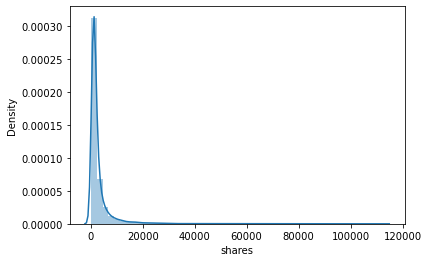

In [9]:
y=dataset.shares
sns.distplot(y, kde=True);

##### Ici on voit la repartition de la variable partage, on peut voir que la grande majorité des valeurs se situe entre 0 et 20 000 partages, alors que certaines valeurs vont jusqu'a 120 000

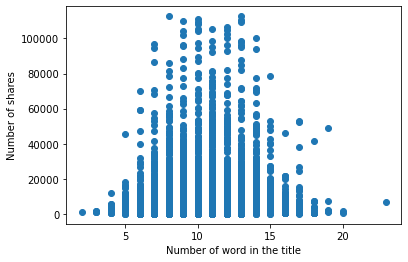

In [10]:
x = dataset.n_tokens_title
y = dataset.shares

plt.scatter(x,y)

plt.xlabel('Number of word in the title')
plt.ylabel('Number of shares')

plt.show()

#### Sur ce graphique on peut voir une nette corrélation entre le nombre de mots dans le titre et le nombre de partages de l'article. Les articles ayant des titres trop longs ou trop courts ne sont que peu repartagés. 

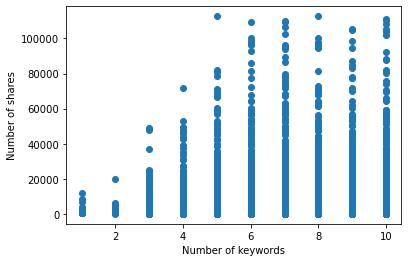

In [11]:
x = dataset.num_keywords
y = dataset.shares

plt.scatter(x,y)

plt.xlabel('Number of keywords')
plt.ylabel('Number of shares')

plt.show()

####  Ici, on peut voir que le nombre de mots clés influe sur le nombre de partages, plus un article a de mots cles et plus il a de chances d'etre repartagé

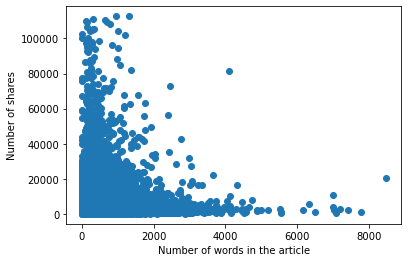

In [12]:
x = dataset.n_tokens_content
y = dataset.shares
plt.scatter(x,y)
plt.xlabel('Number of words in the article')
plt.ylabel('Number of shares')
plt.show()

#### Dans ce graphique, on peut clairement déduire que les articles courts (ceux qui ont peu de mots dans leur contenu), ont plus de chance de se faire partager, ce qui est compréhensjible car de longs articles peuvent paraitre ennuyant 

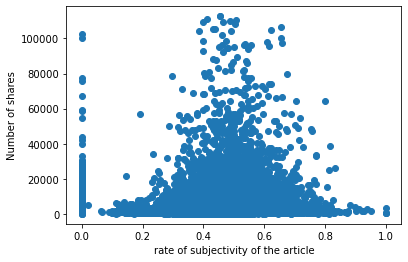

In [13]:
x = dataset.global_subjectivity
y = dataset.shares
plt.scatter(x,y)
plt.xlabel('rate of subjectivity of the article')
plt.ylabel('Number of shares')
plt.show()

#### On voit ici que les articles qui sont ni trop objectifs ni trop subjectifs sont ceux qui sont le plus partagés

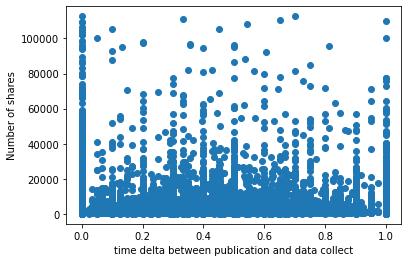

In [14]:
x = dataset.title_subjectivity 
y = dataset.shares
plt.scatter(x,y)
plt.xlabel('time delta between publication and data collect')
plt.ylabel('Number of shares')
plt.show()

####  Un exemple ici d'une variable qui ne parait pas avoir de correlation avec le nombres de partages, cette variable désigne le nombre de jours entre la publication de l'article et la collecte de données. On pourrait ainsi penser que les articles ayant été publiés longtemps avant l'étude ont été plus partagés car ils ont eu plus de temps pour accumuler des partages. Mais ce graphique nous montre qu'il n'en est rien.

Text(0.5, 1.0, 'Moyenne de partage par catégorie')

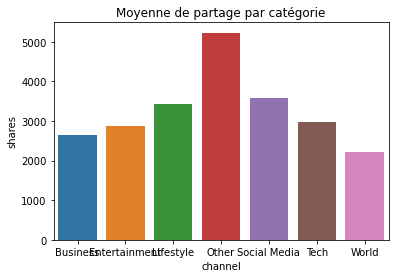

In [15]:
sub_channel=dataset.groupby(['channel']).mean()
sub_channel=sub_channel.reset_index()
sns.barplot(y=sub_channel.shares, x=sub_channel.channel).set_title("Moyenne de partage par catégorie")

#### Ici nous créeons un sous ensemble du dataset principal, où les individus sont groupés par leur catégorie, on peut ainsi comparer la moyenne de partages par catégorie d'article. Bien que ceux qui sont le plus partagés sont ceux qui n'ont pas de catégorie donnée, on peut neanmoins voir un écart entre les articles de type World et ceux de type Social Media qui sont quasiment deux fois plus partagé en moyenne.

Text(0.5, 1.0, 'Moyenne de partage par jour')

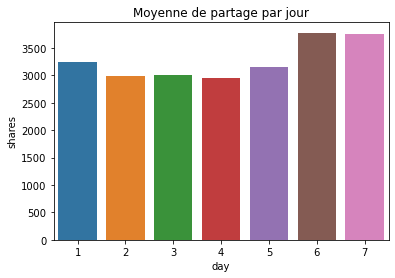

In [16]:
sub_day=dataset.groupby(["day"]).mean()
sub_day=sub_day.reset_index()
sns.barplot(y=sub_day.shares, x=sub_day.day).set_title("Moyenne de partage par jour")

#### Même principe ici à la seule différence que nous avons groupé les individus en fonction du jour de la publication des articles. On observe une légère hausse pour les articles ayant été publiés le week-end, ce qui semble plutôt logique.

Text(0.5, 1.0, 'Moyenne de partage par LDA Topic')

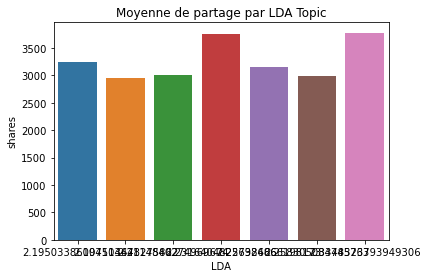

In [22]:
sub_LDA=dataset.groupby(["LDA"]).mean()
sub_LDA=sub_day.reset_index()
sns.barplot(y=sub_LDA.shares, x=sub_LDA.LDA).set_title("Moyenne de partage par LDA Topic")

#### Encore une fois un regroupement, cette fois-ci c'est selon le topic LDA le plus représenté.

On effectue un histogramme pour se rendre compte de l'influence du jour de publication sur le nombre de partages de l'article

<AxesSubplot:title={'center':'shares'}, xlabel='day'>

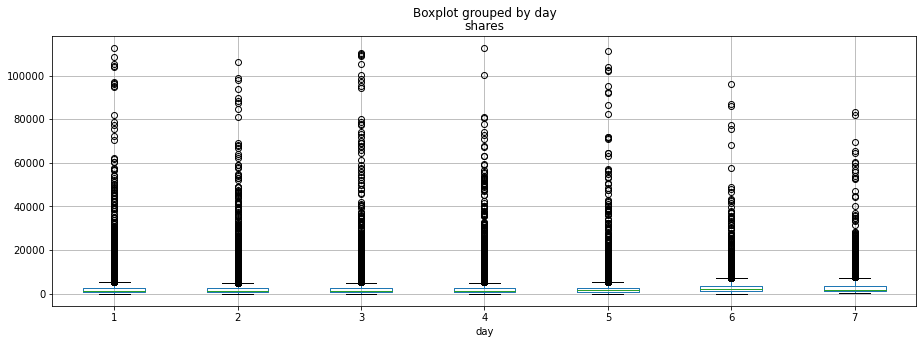

In [18]:
dataset.boxplot(column='shares', by='day',figsize=(15,5), grid=True)

On se rend compte que les articles à buzz ont plus tendance à être publiés en début de semaine, mais le nombre d'individus est trop faible pour pouvoir déceler une tendance générale
Pour différencier la médiane de chaque jour, nous allons éffectuer un zoom sur la partie basse des boxplot (celui-ci est très peu lisible, dû au fait des valeurs extrèmes hautes qui entassent les boxplot)

<AxesSubplot:title={'center':'shares'}, xlabel='day'>

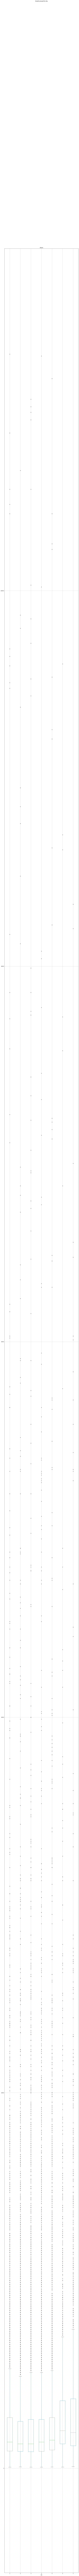

In [19]:
dataset.boxplot(column='shares', by='day',figsize=(15,500), grid=True)

En effectuant un zoom, on remarque que les articles du WE sont en légèrment plus partagés que ceux de la semaaine

<AxesSubplot:title={'center':'shares'}, xlabel='channel'>

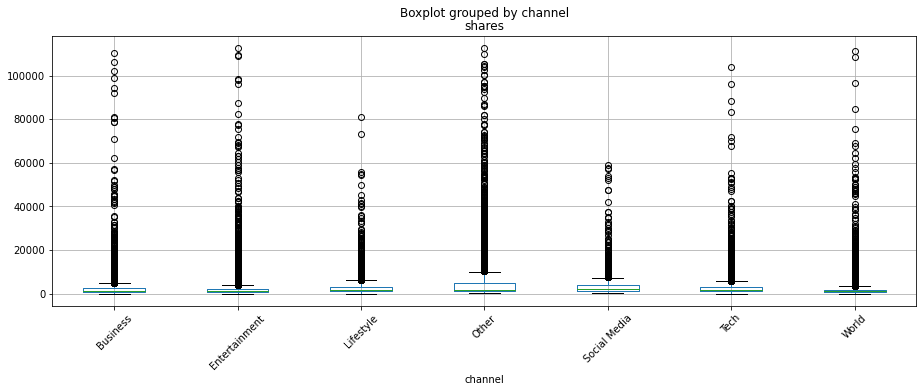

In [20]:

dataset['channel']=dataset.apply(Channel,axis=1)
dataset.boxplot(column='shares', by='channel',figsize=(15,5), rot=45)

shares    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

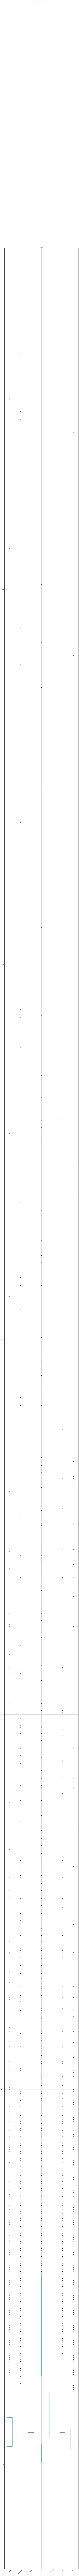

In [21]:
dataset.boxplot(column='shares', by='channel',figsize=(15,500), return_type='axes',rot=45)

# Modélisation

On optimise le dataset, en remplaçant les variables de jours par la colonne 'day', et les colonnes 'data_channel...' par la colonne channel, on est réduit ainsi la dimension, tout en étant sûr de ne pas perdre d'information 

## On commence par évaluer les données en fonction d'un seuil de popularité que nous établissons à 1400 partages (comme énoncé dans la description du dataset)

On récupère à nouveaux les données, puis les traitons pour qu'elles soit utilisables 
On enlevera l'url, et mettrons les variables de jours dans la même colonne

In [23]:
datamodel = pd.read_csv('OnlineNewsPopularity.csv',sep=', ')

def Day(data):
    if data['weekday_is_monday']==1:
        return 1
    if data['weekday_is_tuesday']==1:
        return 2
    if data['weekday_is_wednesday']==1:
        return 3
    if data['weekday_is_thursday']==1:
        return 4
    if data['weekday_is_friday']==1:
        return 5
    if data['weekday_is_saturday']==1:
        return 6
    if data['weekday_is_sunday']==1:
        return 7
    return ''

def Popularity(data):
    if data['shares']<1400:
        return 'unpopular'
    else :
        return 'popular'
            
    
    
datamodel["day"]=datamodel.apply(Day,axis=1)
datamodel["popularity"]=datamodel.apply(Popularity,axis=1)
datamodel=datamodel.drop(datamodel.columns[[0,31,32,33,34,35,36,37,38,60]], axis=1)
datamodel.info()

C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      39644 non-null  float64
 1   n_tokens_title                 39644 non-null  float64
 2   n_tokens_content               39644 non-null  float64
 3   n_unique_tokens                39644 non-null  float64
 4   n_non_stop_words               39644 non-null  float64
 5   n_non_stop_unique_tokens       39644 non-null  float64
 6   num_hrefs                      39644 non-null  float64
 7   num_self_hrefs                 39644 non-null  float64
 8   num_imgs                       39644 non-null  float64
 9   num_videos                     39644 non-null  float64
 10  average_token_length           39644 non-null  float64
 11  num_keywords                   39644 non-null  float64
 12  data_channel_is_lifestyle      39644 non-null 

In [24]:
pca = PCA(n_components=15)
pca.fit(datamodel)

print("Pourcentage de variance expliquée : ")
print(pca.explained_variance_ratio_)
#pca.explained_variance_ratio_.info()
#str(pca)
print("Composantes principales : ")
print(pca.components_)

ValueError: could not convert string to float: 'unpopular'

### 1) Random forest

In [25]:
On initialise les données de départ et d'arrivée (shares)
y=datamodel.popularity
x=datamodel.drop(['popularity'], axis=1)

#division du set en deux sets (train et test)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0)

Trouvons les meilleurs paramètres  de l'arbre randomForest à ce set pour obtenir la meilleure précision possible. Commencons par faire varier la profondeur maximum de l'arbre (max_depth).

<AxesSubplot:title={'center':"Précision du RandomForestClassifier en fonction de la profondeur max de l'arbre"}, xlabel='max_depths', ylabel='Précision (en %)'>

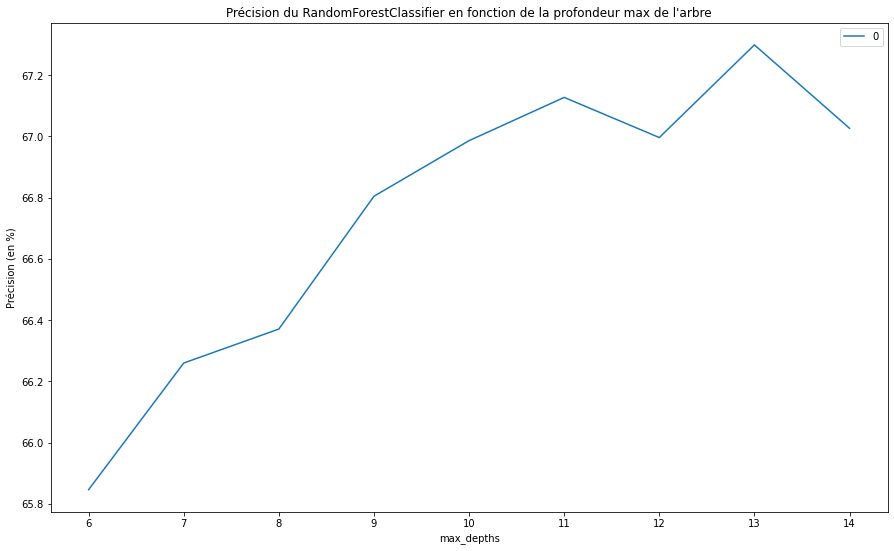

In [26]:
max_depths=[]
accuracy=[]
for i in range(6,15):
    clf = RandomForestClassifier(max_depth=i,n_estimators=270,random_state=0) 
    clf.fit(xtrain, ytrain)
    ypred_rf=clf.predict(xtest)
    max_depths.append(i)
    accuracy.append(accuracy_score(ytest, ypred_rf)*100)

accuracies=pd.DataFrame(accuracy,max_depths)
accuracies.plot(title="Précision du RandomForestClassifier en fonction de la profondeur max de l'arbre", xlabel="max_depths",ylabel="Précision (en %)", figsize=(15,9))

On oberve que la précision augmente jusqu'à une profondeur maximum égale aux alentours de 9-10 où elle atteint son mamximum, gardons alors ce paramètre de côté.
Faisons à présent varier n_estimator représentant le nombre d'arbre effectués dans le randomforest.

<AxesSubplot:title={'center':"Précision du RandomForestClassifier en fonction du nombre d'arbre effectués"}, xlabel='n_estimators', ylabel='Précision (en %)'>

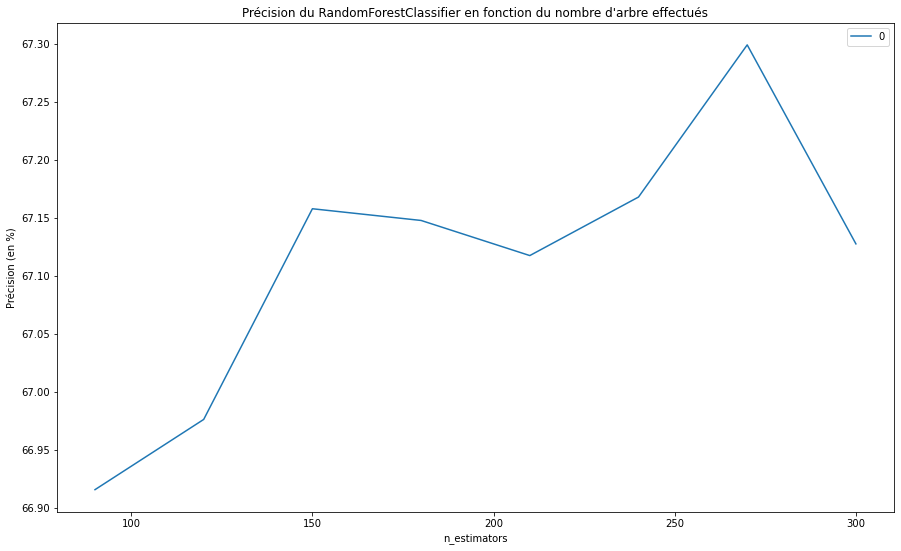

In [27]:
n_estimator=[]
accuracy=[]
for i in range(3,11):
    clf = RandomForestClassifier(max_depth=13,n_estimators=30*i,random_state=0) 
    clf.fit(xtrain, ytrain)
    ypred_rf=clf.predict(xtest)
    n_estimator.append(30*i)
    accuracy.append(accuracy_score(ytest, ypred_rf)*100)

accuracies=pd.DataFrame(accuracy,n_estimator)
accuracies.plot(title="Précision du RandomForestClassifier en fonction du nombre d'arbre effectués", xlabel="n_estimators",ylabel="Précision (en %)", figsize=(15,9))

On atteint la maximum de précision lorsque n_estimator est aux alentours de 240. La précision atteint 67.299 % avec randomForest

In [28]:
clf = RandomForestClassifier(max_depth=13,n_estimators=270,random_state=0) 
clf.fit(xtrain, ytrain)
ypred_rf=clf.predict(xtest)
accuracy_score(ytest, ypred_rf)*100

67.29896075068106

### 2) Decision tree classifier

Regardons quels sont les meilleurs paramètres à rentrer dans le decisiontreeclassifier pour obtenir le meilleur modèle, testons tout d'abord min_samples_leaf qui représente le nombre minimum d'échantillons requis se retrouver à un nœud de feuille

<AxesSubplot:title={'center':"Précision du DecisionTreeClassifier en fonction du nombre minimum d'échantillon de l'arbre"}, xlabel='min_samples_leaf', ylabel='Précision (en %)'>

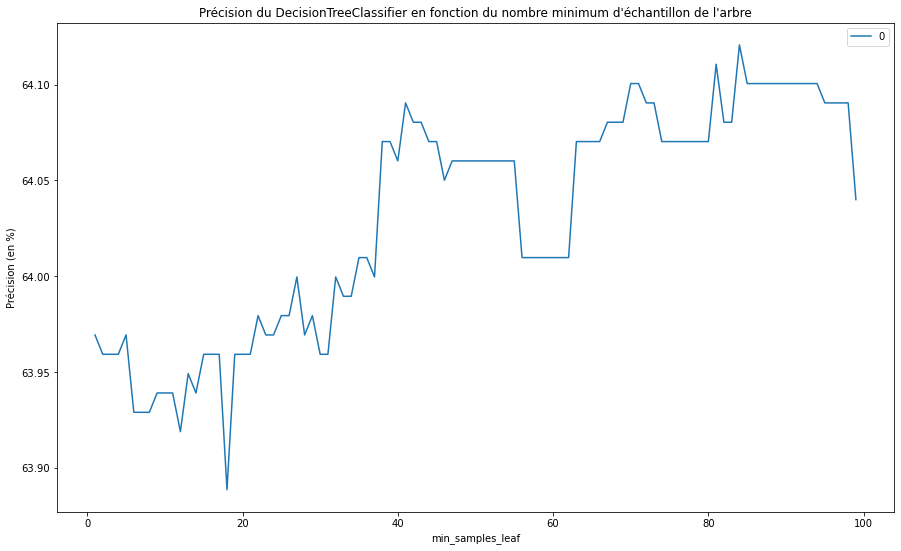

In [29]:
min_samples_leafs=[]
accuracy=[]
for i in range(1,100):
    clf_tree = tree.DecisionTreeClassifier(min_samples_leaf = i,max_depth = 6) 
    clf_tree.fit(xtrain, ytrain)
    ypred_tree=clf_tree.predict(xtest)
    min_samples_leafs.append(i)
    accuracy.append(accuracy_score(ytest, ypred_tree)*100)
    

accuracies=pd.DataFrame(accuracy,min_samples_leafs)
accuracies.plot(title="Précision du DecisionTreeClassifier en fonction du nombre minimum d'échantillon de l'arbre", xlabel="min_samples_leaf",ylabel="Précision (en %)", figsize=(15,9))

On attend un maximum à 64,83% de précisionlorsque min_samples_leaf est aux alentours de 90-100
A présent testons le paramètre max_depth imposant une profondeur à l'arbre.

<AxesSubplot:title={'center':"Précision du DecisionTreeClassifier en fonction de la profondeur de l'arbre"}, xlabel='max_depth', ylabel='Précision (en %)'>

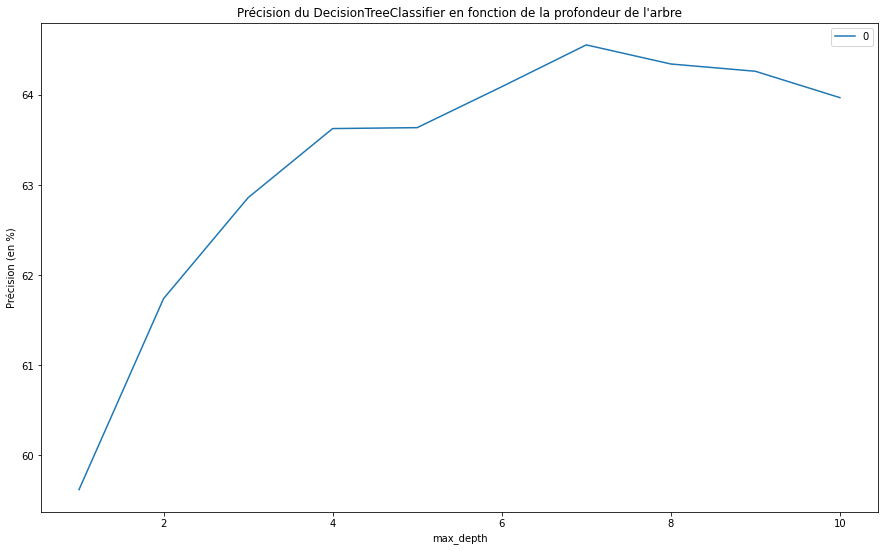

In [30]:
max_deapths=[]
accuracy=[]
for i in range(1,11):
    clf_tree = tree.DecisionTreeClassifier(max_depth = i, min_samples_leaf = 95) 
    clf_tree.fit(xtrain, ytrain)
    ypred_tree=clf_tree.predict(xtest)
    max_deapths.append(i)
    accuracy.append(accuracy_score(ytest, ypred_tree)*100)
    

accuracies=pd.DataFrame(accuracy,max_deapths)
accuracies.plot(title="Précision du DecisionTreeClassifier en fonction de la profondeur de l'arbre", xlabel="max_depth",ylabel="Précision (en %)", figsize=(15,9))

On atteint notre maximum lorsque la profondeur maximum est égale à 6. Les meilleurs paramètres pour ce modèle sont 
max_depth = 6, min_samples_leaf = 90, nous obtenons ainsi une précision de :

In [31]:
#Score maximum du modèle :
clf_tree = tree.DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 90) 
clf_tree.fit(xtrain, ytrain)
ypred_tree=clf_tree.predict(xtest)
accuracy_score(ytest, ypred_tree)*100

64.10049440016144

### 3) Logistic Regression

Maintenant, sur le modèle de la regréssion logistique, regardons le le nombre max d'itération

C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algo

<AxesSubplot:title={'center':"Précision de la LogisticRegression en fonction de la profondeur de l'arbre"}, xlabel='max_iter', ylabel='Précision (en %)'>

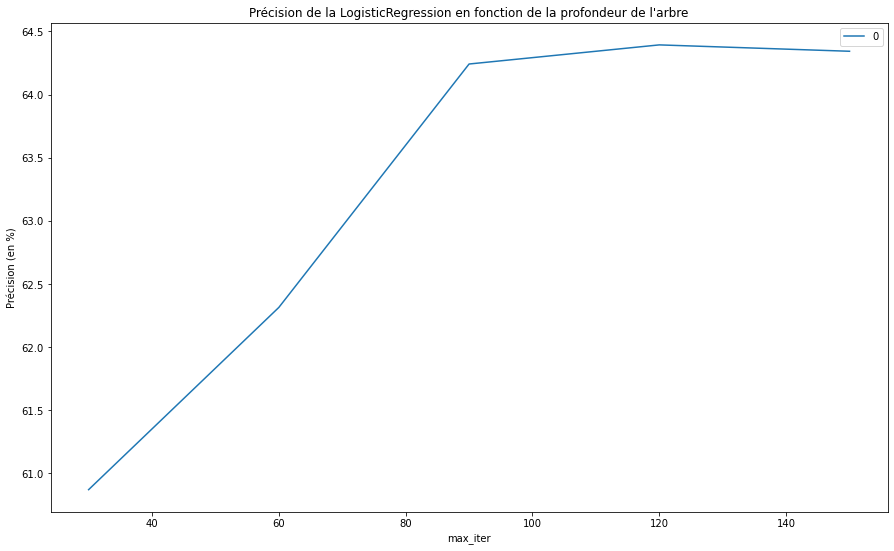

In [32]:
max_iters=[]
accuracy=[]
for i in range(1,6):
    LogReg = LogisticRegression(max_iter=i*30,penalty="none",solver="newton-cg") 
    LogReg.fit(xtrain, ytrain)
    ypred_LogReg=LogReg.predict(xtest)
    accuracy.append(accuracy_score(ytest, ypred_LogReg)*100)
    max_iters.append(i*30)

accuracies=pd.DataFrame(accuracy,max_iters)
accuracies.plot(title="Précision de la LogisticRegression en fonction de la profondeur de l'arbre", xlabel="max_iter",ylabel="Précision (en %)", figsize=(15,9))

On observe que la précision monte jusqu'à un nombre d'itération aux alentours de 200-210. Nous allons garder le paramètres max_iter aux alentours de 200

In [33]:
#Meilleur paramètre pour la logistique regression
LogReg = LogisticRegression(max_iter=210, penalty="none", solver="newton-cg") 
LogReg.fit(xtrain, ytrain)
ypred_LogReg=LogReg.predict(xtest)
accuracy_score(ytest, ypred_LogReg)*100

C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line s

64.07022500252245

### 4) Gradient Boosting

Testons à présent la méthode du gradient boosting

<AxesSubplot:title={'center':"Précision du GradientBoostingClassifier en fonction du nombre d'arbre effectués"}, xlabel='n_estimators', ylabel='Précision (en %)'>

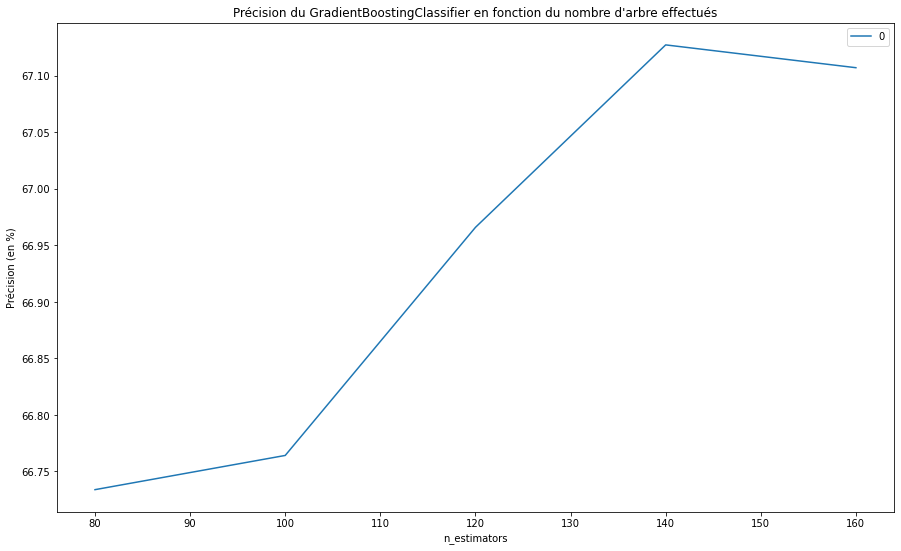

In [34]:
n_estimator=[]
accuracy=[]
for i in range(4,9):
    clf_GBC = GradientBoostingClassifier(n_estimators=20*i, learning_rate=0.2,max_depth=2,random_state=0)
    clf_GBC.fit(xtrain,ytrain)
    ypred_gbc=clf_GBC.predict(xtest)
    n_estimator.append(20*i)
    accuracy.append(accuracy_score(ytest, ypred_gbc)*100)

accuracies=pd.DataFrame(accuracy,n_estimator)
accuracies.plot(title="Précision du GradientBoostingClassifier en fonction du nombre d'arbre effectués", xlabel="n_estimators",ylabel="Précision (en %)", figsize=(15,9))
#clf_GBC = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=2,random_state=0)
#clf_GBC.fit(xtrain,ytrain)
#y_pred_gbc=clf_GBC.predict(xtest)
#accuracy_score(ytest,y_pred_gbc)*100

On observe un pic de précision aux alentours des 60 arbres effetués dans le modèle du gradient boosting classifier. Faisons à présent varier le paramètre learning_rate (permettant de réduire la contribution de chaque arbre du modèle). Ce dernier paramètre étant lié avec le nombre d'arbe (que nous venons de tester) nous éxécutons plusiers fois les deux codes en changeant à chaque fois le nouveau paramètre trouvé afin de réajuster notre modèle. Nous avons d'abord trouver n_estimator maximisant la précision à 60, en changeant ce n_estimator dans le test du learning_rate, nous en avons déduit que learning_rate maximisait la précision en 0.6. Nous avons changeons le paramètre learning_rate *dans le test de n_estimator, et ainsi de suite. 
Evolution des paramètres (60 puis 200, puis 140)

<AxesSubplot:title={'center':'Précision du GradientBoostingClassifier en fonction du learning_rate'}, xlabel='learning_rate', ylabel='Précision (en %)'>

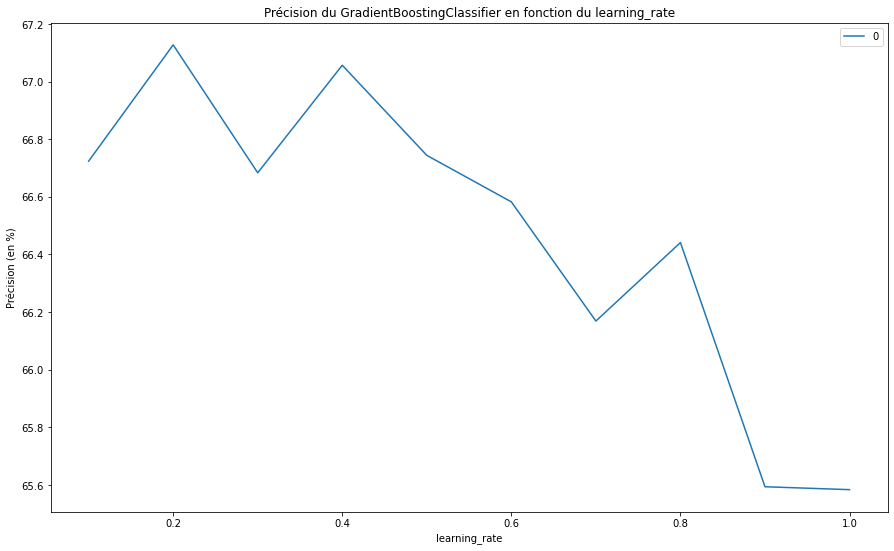

In [35]:
learning_rate=[]
accuracy=[]
for i in range(1,11):
    clf_GBC = GradientBoostingClassifier(n_estimators=140, learning_rate=0.1*i,max_depth=2,random_state=0)
    clf_GBC.fit(xtrain,ytrain)
    ypred_gbc=clf_GBC.predict(xtest)
    learning_rate.append(0.1*i)
    accuracy.append(accuracy_score(ytest, ypred_gbc)*100)

accuracies=pd.DataFrame(accuracy,learning_rate)
accuracies.plot(title="Précision du GradientBoostingClassifier en fonction du learning_rate", xlabel="learning_rate",ylabel="Précision (en %)", figsize=(15,9))

On obtient une précision maximum lorsque le learning_Rate atteint 0.6, puis 0.2

In [36]:
#On retient ainsi comme meilleur paramètre 
clf_GBC = GradientBoostingClassifier(n_estimators=140, learning_rate=0.2,max_depth=2,random_state=0)
clf_GBC.fit(xtrain,ytrain)
y_pred_gbc=clf_GBC.predict(xtest)
accuracy_score(ytest,y_pred_gbc)*100

67.12743416406013

### 5) Stochastic gradient descent

<AxesSubplot:title={'center':"Précision du Stochastic gradient descent en fonction du nombre d'arbre effectués"}, xlabel='max_iters', ylabel='Précision (en %)'>

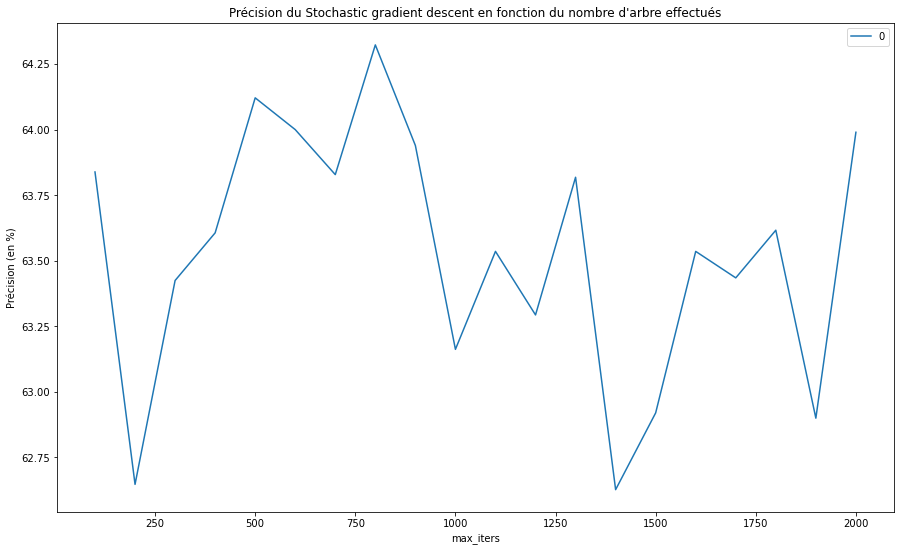

In [37]:
max_iters=[]
accuracy=[]
for i in range(1,21):
    clf_sgdc=make_pipeline(StandardScaler(), SGDClassifier(max_iter=100*i,loss='log', penalty='elasticnet'))
    clf_sgdc.fit(xtrain, ytrain)
    y_pred_sgdc=clf_sgdc.predict(xtest)
    max_iters.append(100*i)
    accuracy.append(accuracy_score(ytest,y_pred_sgdc)*100)

accuracies=pd.DataFrame(accuracy,max_iters)
accuracies.plot(title="Précision du Stochastic gradient descent en fonction du nombre d'arbre effectués", xlabel="max_iters",ylabel="Précision (en %)", figsize=(15,9))



Globalement, on remarque que la précision stagne jusqu'à 1700 de maximum d'itération, puis que celle-ci baisse

In [38]:
#On gardera pour résultat
clf_sgdc=make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, penalty='elasticnet', loss='log',random_state=1))
clf_sgdc.fit(xtrain, ytrain)
y_pred_sgdc=clf_sgdc.predict(xtest)
accuracy_score(ytest,y_pred_sgdc)*100

63.5051962465947

### 6) Support vector machine

In [39]:
clf_svm = svm.SVC(C=1)
clf_svm.fit(xtrain, ytrain)
y_pred_svm=clf_svm.predict(xtest)
accuracy_score(ytest,y_pred_svm)*100

55.080213903743314

Ce modèle plus efficace pour les problèmes de regression que de classification

### 7) ADABoost

Testons le modèle ADABoost, faisons varier les paramètres et observons leur influence sur le résultat

<AxesSubplot:title={'center':"Précision du modèle ADABoost en fonction du nombre d'arbre effectués"}, xlabel='n_estimators', ylabel='Précision (en %)'>

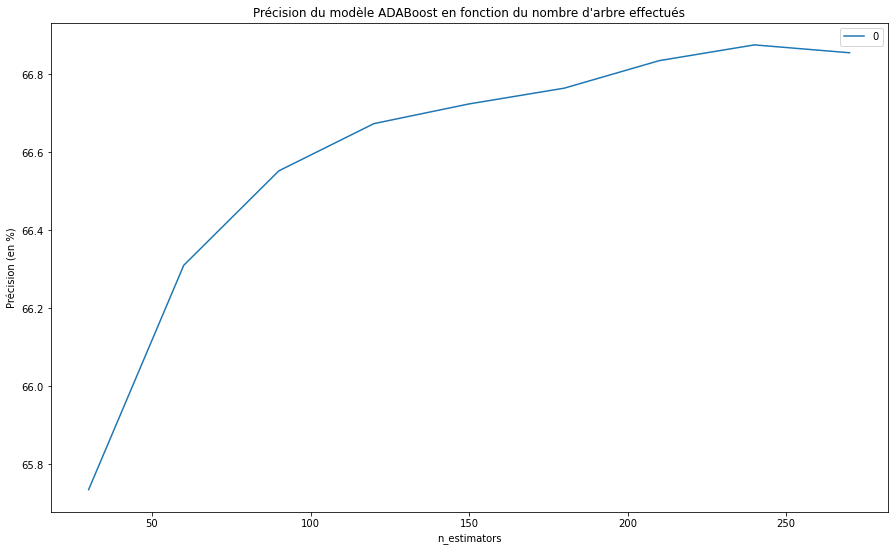

In [42]:
n_estimator=[]
accuracy=[]
for i in range(1,10):
    clf_ada = AdaBoostClassifier(n_estimators=30*i, learning_rate=0.5, random_state=0)
    clf_ada.fit(xtrain, ytrain)
    y_pred_ada=clf_ada.predict(xtest)
    n_estimator.append(30*i)
    accuracy.append(accuracy_score(ytest, y_pred_ada)*100)


accuracies=pd.DataFrame(accuracy,n_estimator)
accuracies.plot(title="Précision du modèle ADABoost en fonction du nombre d'arbre effectués", xlabel="n_estimators",ylabel="Précision (en %)", figsize=(15,9))

La précision atteint son maximum avec un nombre d'arbre aux alentours de 180. A présent, testons le paramètre learning_rate (lié au nombre d'arbe), et ajustons notre modèle.

<AxesSubplot:title={'center':'Précision du modèle Adaboost en fonction du learning_rate'}, xlabel='learning_rate', ylabel='Précision (en %)'>

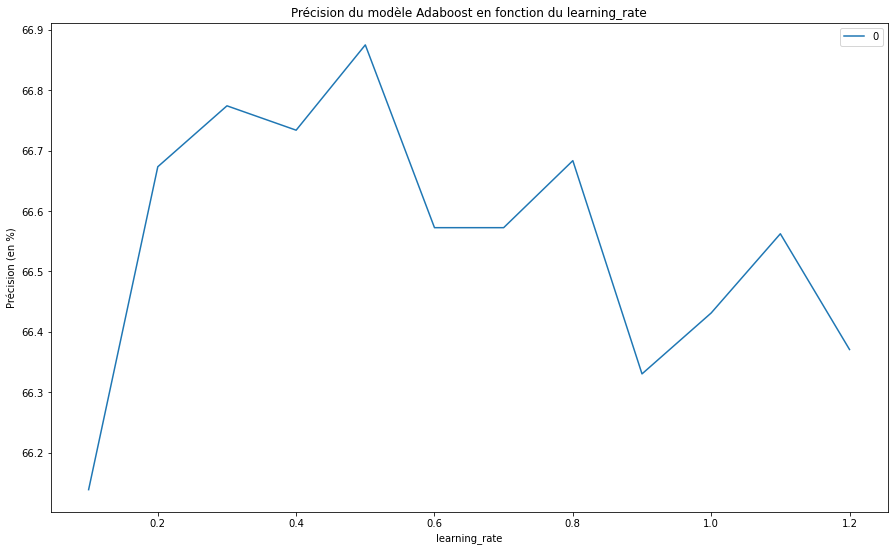

In [43]:
learning_rate=[]
accuracy=[]
for i in range(1,13):
    clf_ada = AdaBoostClassifier(n_estimators=240, learning_rate=0.1*i, random_state=0)
    clf_ada.fit(xtrain, ytrain)
    y_pred_ada=clf_ada.predict(xtest)
    learning_rate.append(0.1*i)
    accuracy.append(accuracy_score(ytest, y_pred_ada)*100)

accuracies=pd.DataFrame(accuracy,learning_rate)
accuracies.plot(title="Précision du modèle Adaboost en fonction du learning_rate", xlabel="learning_rate",ylabel="Précision (en %)", figsize=(15,9))

La précision atteint son maximum lorsque le learning rate est égale à 0.5

In [44]:
#Meilleurs paramètres
clf_ada = AdaBoostClassifier(n_estimators=240, learning_rate=0.5, random_state=0)
clf_ada.fit(xtrain, ytrain)
y_pred_ada=clf_ada.predict(xtest)
accuracy_score(ytest, y_pred_ada)*100

66.87518918373524

### 8) Naive baye

Testons le modeèle

In [45]:
clf_nb = GaussianNB(var_smoothing=1e-1)
clf_nb.fit(xtrain, ytrain)
y_pred_nb=clf_nb.predict(xtest)
accuracy_score(ytest, y_pred_nb)*100

50.87276763192412

## Modèle réduit pour l'API

Nous avons choisi de créer un nouveau modèle servant uniquement dans le cadre de l'API, celui ci ne prend en compte que 4 paramètres qui sont facilement compréhensibles par le client de l'API.

In [46]:
datamodelAPI = pd.read_csv('OnlineNewsPopularity.csv',sep=', ')

def Day(data):
    if data['weekday_is_monday']==1:
        return 1
    if data['weekday_is_tuesday']==1:
        return 2
    if data['weekday_is_wednesday']==1:
        return 3
    if data['weekday_is_thursday']==1:
        return 4
    if data['weekday_is_friday']==1:
        return 5
    if data['weekday_is_saturday']==1:
        return 6
    if data['weekday_is_sunday']==1:
        return 7
    return ''

datamodelAPI["day"]=datamodelAPI.apply(Day,axis=1)
datamodelAPI=datamodelAPI.drop(datamodelAPI.columns[0], axis=1)
datamodelAPI=datamodelAPI.drop(datamodelAPI.columns[3:10], axis=1)
datamodelAPI=datamodelAPI.drop(datamodelAPI.columns[3], axis=1)
datamodelAPI=datamodelAPI.drop(datamodelAPI.columns[5:42], axis=1)
datamodelAPI=datamodelAPI.drop(datamodelAPI.columns[0], axis=1)
datamodelAPI=datamodelAPI.drop(datamodelAPI.columns[4:13], axis=1)
datamodelAPI=datamodelAPI.drop(datamodelAPI.columns[3], axis=1)
datamodelAPI.info()

C:\Users\Arthur Brasseur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   n_tokens_title    39644 non-null  float64
 1   n_tokens_content  39644 non-null  float64
 2   num_keywords      39644 non-null  float64
 3   shares            39644 non-null  int64  
 4   day               39644 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.5 MB


##### Cette fois ci le but sera simplement de prédire le nombre de partages d'un article, et non si il sera populaire ou non comme vu précédemment.

In [48]:
#On initialise les données de départ et d'arrivée (shares)
y=datamodelAPI.shares
x=datamodelAPI.drop(['shares'], axis=1)

#division du set en deux sets (train et test)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0)

#Création et entrainement du modèle
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xtrain, ytrain)

#Prédiction
ypred=clf.predict(xtest)
ypred

array([1000,  628,  997, ..., 1700,  978, 1200], dtype=int64)

In [51]:
#Création du fichier pickle
pickle.dump(clf, open('projetAPI.pickle', 'wb'))
model=pickle.load(open('projetAPI.pickle', 'rb'))